## The King Telescope

The 70 cm King telescope is located at the MPIA, Heidelberg. Currently it is used for a student Praktikum. The information on this page is based upon the [wiki](https://svn.mpia.de/trac/gulli/king/wiki/WikiStart/Documentation ).


In [1]:
#import key packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from matplotlib.patches import Rectangle

Key numbers for the KING are 

| What | Value |
| --- | --- |
| Aperture |	70 cm |
|F# |	8 |
| Focal distance |	5600 mm |
| Plate scale |	27 μm/arcsec (37 arcsec/mm) |
| Field of View (without coma) |	11.7 arcmin = 18.95 mm (without corrector) |
| Field of View (maximum usable) |	20 arcmin = 32.4 mm |
| Focal station |	Cassegrain |
| Focus mechanism |	Secondary mirror |
| Focus range | ? |	


In [2]:
#Putting the above information into python

aperture = .7 #meters
f_ratio = 8.
focal_distance = 5.6 #meters
focal_distance_mm = 5600 #mm
plate_scale = 27 #μm/arcsec (37 arcsec/mm) 
Field_of_View = 11.7 #arcmin, arcmin = 18.95 mm (without corrector) 
Field_of_View_max = 20 # arcmin = 32.4 mm 
#Focal station 	Cassegrain 
#Focus mechanism Secondary mirror 
#Focus range  ? 

#Quick checks - focal ratio = focal length/diameter
print("The focal ratio is %.2f" % (focal_distance/aperture))




The focal ratio is 8.00


With those telescope parameters we can make a first approximation of what we would need to couple into a fiber system. Normally a good number to use is a Numerical Aperture of 0.14 (for coupling into a fiber), which corresponds to a focal ratio of 3.57, this means we need to reduce the focal ratio by ~ 2.

Key here is that the plate scale changes



In [3]:
# plate_scale = 206265/f

plate_scale_check = 206265/focal_distance_mm #arcseconds per mm
print(plate_scale_check)

#but now we have reduced the focal ratio by 2, D is the same so f becomes a factor of 2 smaller
plate_scale_fiber = 206265/(2*focal_distance_mm)  #arcseconds per mm)

print("The rough plate scale would be %.1f arcseconds per mm"%plate_scale_fiber)


36.833035714285714
The rough plate scale would be 18.4 arcseconds per mm


Make a quick simple plot to show fiber diameter vs what we see


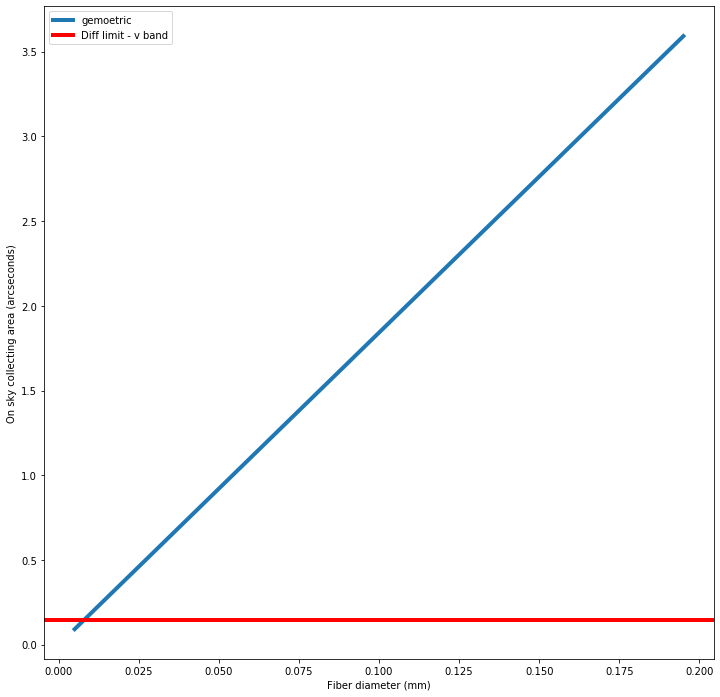

In [22]:
fiber_d = np.arange(5,200,5)/1000 #fiber core diameter mm

on_sky_angle = plate_scale_fiber*fiber_d

plt.figure(figsize= (12,12))
plt.plot(fiber_d, on_sky_angle, label= "gemoetric", lw =4)
plt.axhline(1000e-9*aperture*180/3.14*3600, color = "r", label = "Diff limit - v band", lw =4)
plt.xlabel("Fiber diameter (mm)")
plt.ylabel("On sky collecting area (arcseconds)")
plt.legend()
plt.show()

In [5]:
# NEED TO MAKE THIS RELEVANT INSTEAD OF RANDOM FIBER

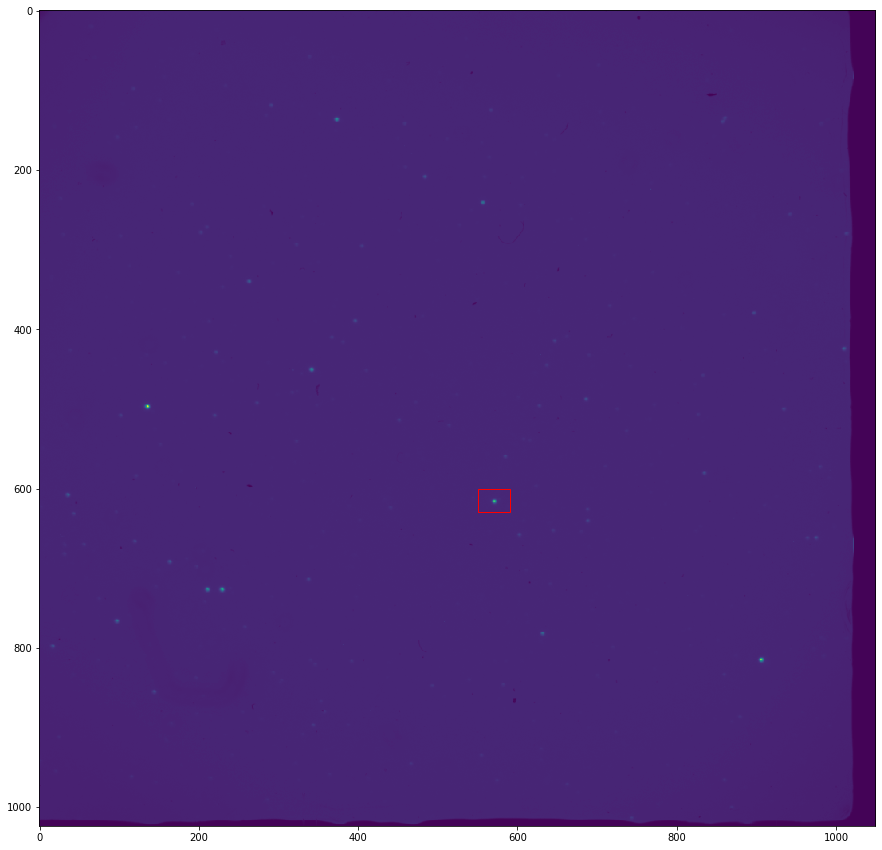

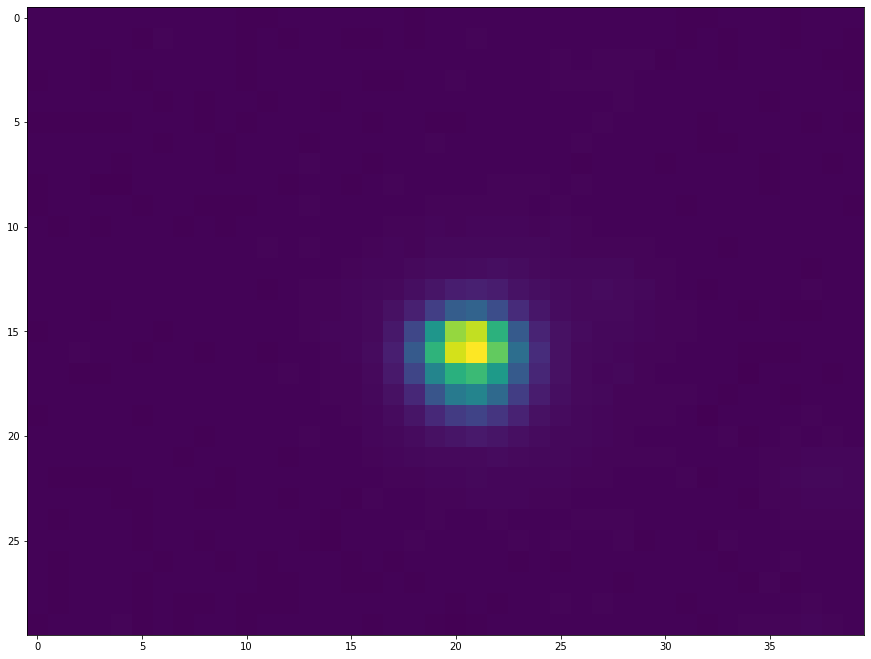

In [6]:
#check image data to see what sort of PSF we get from the telescope

image_data = fits.getdata("../files/NGC7000_V_science0001.fits", ext=0)

y1 = 600
y2 = 630
x1 = 550
x2 = 590

sub_window = image_data[y1:y2, x1:x2]

plt.figure(figsize=(15,15))
plt.imshow(image_data)
# Get the current reference
ax = plt.gca()
# Create a Rectangle patch
rect = Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)


# blow up data


plt.figure(figsize=(15,15))
plt.imshow(sub_window)



It is currently equipped with a scientific grade 2kx2k back-illuminated, nitrogen-cooled SITe CCD -- identical to cameras used e.g. at ​Calar Alto Observatory. With a pixel size of 15umx15um it provides a field of view of 18.8x18.8 arcmin.

I would guess right now at 9 pixels - 135 um (fine for a fiber) and fits with what I know of the site (that's average seeing)
